You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

***stores.csv***

This file contains anonymized information about the 45 stores, indicating the type and size of store.

***train.csv***

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

* Store - the store number

* Dept - the department number

* Date - the week

* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week


***test.csv***

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

***features.csv***

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week
  For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13



In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',font_scale=1.3)
color = sns.color_palette()
pd.options.display.max_columns=100 # to see columns

In [179]:
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')

In [180]:
train['Date']=pd.DatetimeIndex(train.Date)
features['Date'] = pd.DatetimeIndex(features.Date)

### Merging Dataframes

In [181]:
df_1 = features.merge(stores, on='Store', how='left')
df_1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [182]:
df = train.merge(df_1, on=['Store','Date','IsHoliday'], how='left')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


### Create 'Week' ,'Year' from date

In [183]:
df['Week'] = df.Date.dt.week
df['Year'] = df.Date.dt.year

In [184]:
df.shape

(421570, 18)

## Looking at columns

In [185]:
df['Store'].nunique()

45

In [186]:
df['Dept'].nunique()

81

In [187]:
df['Dept'].max()

99

there are 45 stores and within stores there are 81 Departments(labeled from 1 to 99 , some Department numbers are missing )

Now, I will look at the average weekly sales for each store and each department to see if there is any weird values or not. There are 45 stores and 81 departments for stores.

In [189]:
Store_Dept_table = pd.pivot_table(index='Store',columns='Dept',
                                  values='Weekly_Sales',data=df,aggfunc=np.mean )
#by default np.mean is applied
display(Store_Dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

Store numbers begin from 1 to 45, department numbers are from 1 to 99, but some numbers are missing such as there is no 88 or 89 etc. Total number of departments is 81.

From the pivot table, it is obviously seen that there are some wrong values such as there are 0 and minus values for weekly sales. But sales amount can not be minus. Also, it is impossible for one department not to sell anything whole week. So, I will change this values

In [151]:
df.loc[df['Weekly_Sales']<0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315,32,2012
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315,18,2012
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,10,2010
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315,40,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221,6,2010
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221,7,2010
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221,15,2010
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221,26,2010


1358 rows in 421570 rows means 0.3%, so I can delete and ignore these rows which contains wrong sales values.

In [190]:
df  = df.loc[df['Weekly_Sales']> 0]

## IsHoliday Column

Text(0.5, 1.0, 'Weekly_sales with respect to IsHoliday')

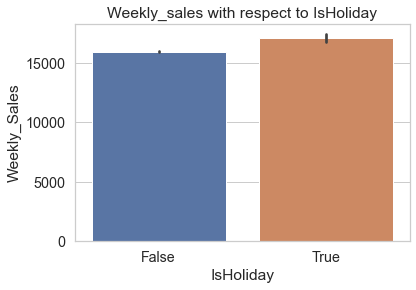

In [161]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly_sales with respect to IsHoliday')

In [165]:
holidays = df[df['IsHoliday']==True]
holidays['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

here are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

In [169]:
Not_holidays = df[df['IsHoliday']!=True]
Not_holidays['Date'].nunique()

133

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [212]:
# Make new column Super_bowl iand set dates in train set to true , other dates to False

df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [213]:
## Make new column Labour_day iand set dates in train set to true , other dates to False

df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [214]:
## Make new column Thanksgiving iand set dates in train set to true , other dates to False

df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [215]:
## Make new column Christmas iand set dates in train set to true , other dates to False

df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

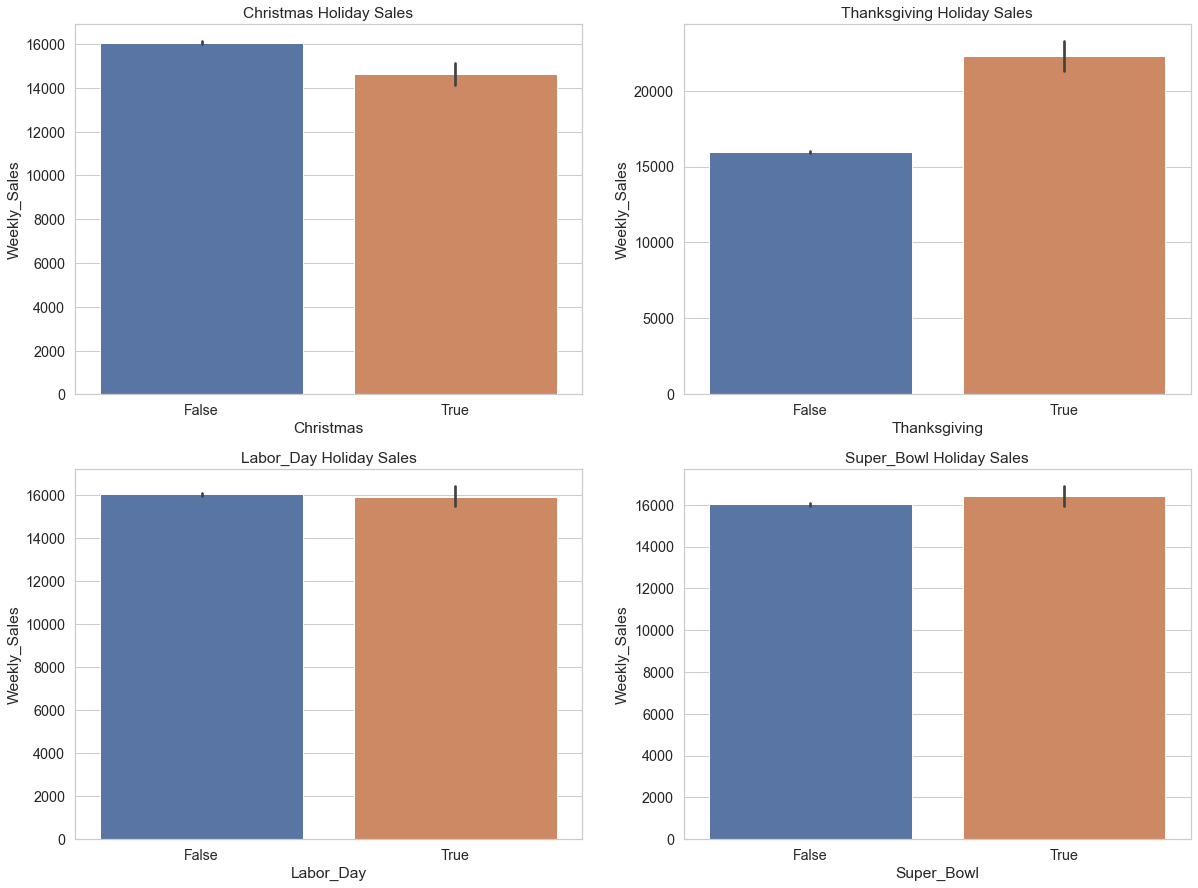

In [204]:
plt.figure(figsize=(20,15))
plt.subplot(221)
sns.barplot(x='Christmas',y='Weekly_Sales', data=df)
plt.title('Christmas Holiday Sales')

plt.subplot(222)
sns.barplot(x='Thanksgiving',y='Weekly_Sales', data=df)
plt.title('Thanksgiving Holiday Sales')

plt.subplot(223)
sns.barplot(x='Labor_Day',y='Weekly_Sales', data=df)
plt.title('Labor_Day Holiday Sales')

plt.subplot(224)
sns.barplot(x='Super_Bowl',y='Weekly_Sales', data=df)
plt.title('Super_Bowl Holiday Sales')
plt.show()

It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. I think, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

## Type Effect on Holidays

In [310]:
Type_Christmas = (df.groupby(['Christmas','Type']).Weekly_Sales.sum().reset_index())
Type_Christmas = Type_Christmas[Type_Christmas['Christmas']==True]

Type_Super_Bowl = df.groupby(['Super_Bowl','Type']).Weekly_Sales.sum().reset_index()
Type_Super_Bowl = Type_Super_Bowl[Type_Super_Bowl['Super_Bowl']==True]

Type_Labor_Day = df.groupby(['Labor_Day','Type']).Weekly_Sales.sum().reset_index()
Type_Labor_Day = Type_Labor_Day[Type_Labor_Day['Labor_Day']==True]

Type_Thanksgiving = df.groupby(['Thanksgiving','Type']).Weekly_Sales.sum().reset_index()
Type_Thanksgiving = Type_Thanksgiving[Type_Thanksgiving['Thanksgiving']==True]


In [321]:
temp = pd.concat([Type_Thanksgiving,Type_Labor_Day,Type_Super_Bowl,Type_Christmas])[['Type','Weekly_Sales']].reset_index(drop=True)

,Type,Weekly_Sales
0,A,83371433.42
1,B,43312947.82
2,C,5730670.87
3,A,90799369.83
4,B,41134973.00
5,C,8795285.28
6,A,93829272.93
7,B,42886602.14
8,C,8967938.53
9,A,55406566.96


KeyError: 'Weekly_Sales'

## Taking a look at Weekly_Sales column

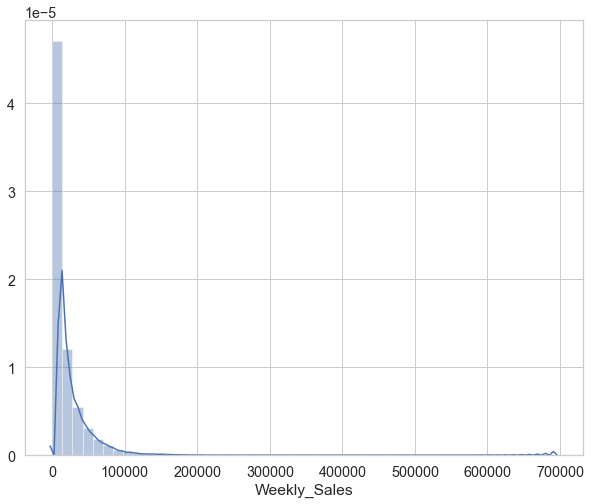

In [227]:
plt.figure(figsize=(10,8))
sns.distplot(df['Weekly_Sales'])

0.429670358208627

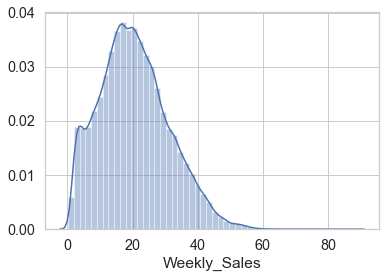

In [272]:
sns.distplot((df.Weekly_Sales)**(1/3))
((df.Weekly_Sales)**(1/3)).skew()

Since we can see the distribution is nearly uniform after cuberoot transformation , we will use cuberoot transformation

In [279]:
df['Weekly_Sales_transformed'] = (df.Weekly_Sales)**(1/3)

## Type Column

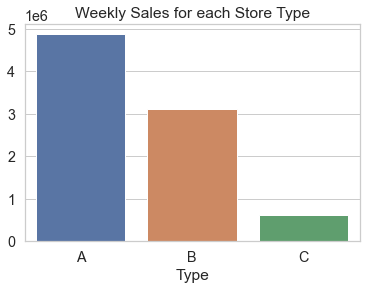

In [285]:
temp = df.groupby(['Type']).Weekly_Sales_transformed.sum()
sns.barplot(temp.index, temp.values)
plt.title('Weekly Sales for each Store Type');

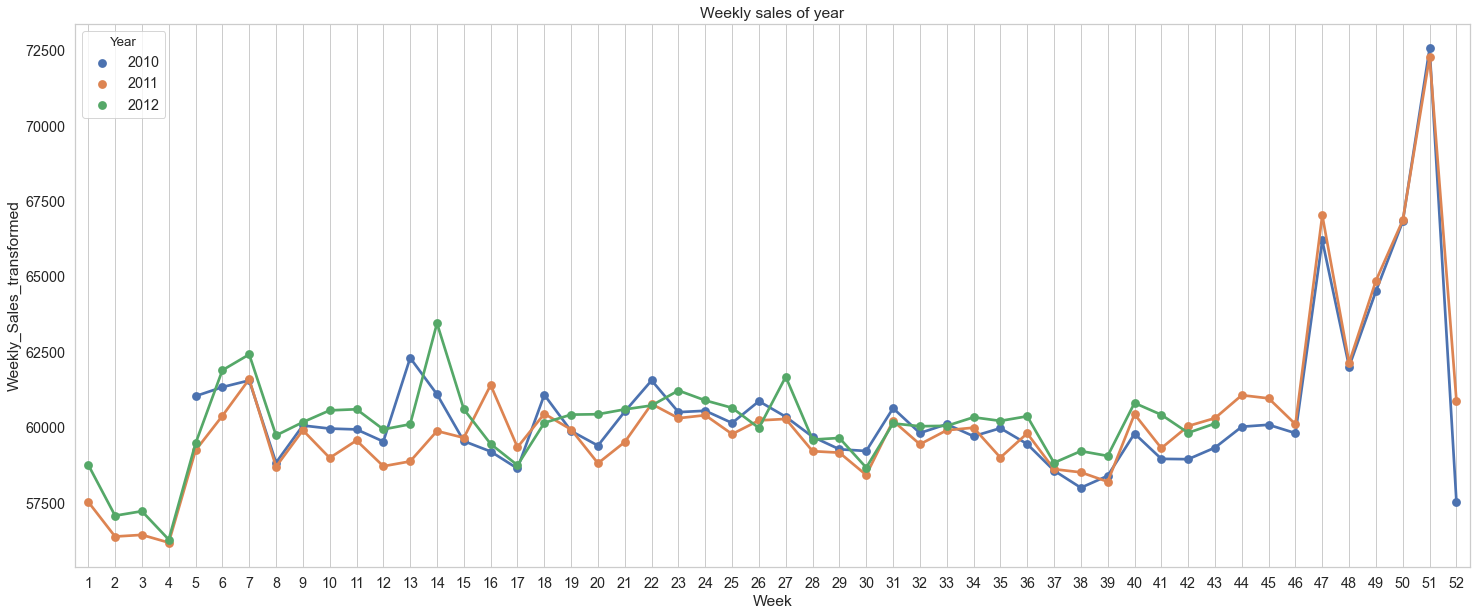

In [282]:
temp = (df
         .groupby(['Year','Week'])
         .Weekly_Sales_transformed.sum()
         .reset_index())

plt.figure(figsize=(25,10))
sns.pointplot(x='Week', y='Weekly_Sales_transformed',hue = 'Year' ,data=temp)
plt.title('Weekly sales of year')
plt.grid()

As we can see, there is one important Holiday not included in 'IsHoliday'. It's the Easter Day. It is always in a Sunday, but can fall on different weeks.

In 2010 is in Week 13

In 2011, Week 16

Week 14 in 2012

So, we can change to 'True' these Weeks in each Year.

In [126]:
df[(df['Year']==2010) & (df['Week']==13)].IsHoliday = True
df[(df['Year']==2011) & (df['Week']==16)].IsHoliday = True
df[(df['Year']==2012) & (df['Week']==14)].IsHoliday = True

In [223]:
df[df['Week'] == 47]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
42,1,1,2010-11-26,18820.29,True,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,A,151315,47,2010,False,False,True,False
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,A,151315,47,2011,False,False,True,False
185,1,2,2010-11-26,45681.98,True,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,A,151315,47,2010,False,False,True,False
237,1,2,2011-11-25,44259.59,True,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,A,151315,47,2011,False,False,True,False
328,1,3,2010-11-26,10706.81,True,64.52,2.735,NaN,NaN,NaN,NaN,NaN,211.748433,7.838,A,151315,47,2010,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421241,45,95,2011-11-25,48012.46,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,B,118221,47,2011,False,False,True,False
421334,45,97,2010-11-26,5333.38,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,B,118221,47,2010,False,False,True,False
421386,45,97,2011-11-25,5200.55,True,48.71,3.492,140.87,384.82,26961.99,28.59,1110.12,188.350400,8.523,B,118221,47,2011,False,False,True,False
421469,45,98,2010-11-26,335.33,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,B,118221,47,2010,False,False,True,False
